<a href="https://colab.research.google.com/github/alanexplorer/notebook_code/blob/master/robotic_probabilistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1: Discrete Filter
In this exercise you will be implementing a discrete Bayes filter accounting for the motion of a
robot on a 1-D constrained world.
Assume that the robot lives in a world with 20 cells and is positioned on the 10th cell. The
world is bounded, so the robot cannot move to outside of the specified area. Assume further that
at each time step the robot can execute either a move forward or a move backward command.
Unfortunately, the motion of the robot is subject to error, so if the robot executes an action it will
sometimes fail. When the robot moves forward we know that the following might happen:

1. With a 25% chance the robot will not move
2. With a 50% chance the robot will move to the next cell
3. With a 25% chance the robot will move two cells forward
4. There is a 0% chance of the robot either moving in the wrong direction or more than two cells forwards

Assume the same model also when moving backward, just in the opposite direction.
Since the robot is living on a bounded world it is constrained by its limits, this changes the motion
probabilities on the boundary cells, namely:
1. If the robot is located at the last cell and tries to move forward, it will stay at the same cell with a chance of 100%
2. If the robot is located at the second to last cell and tries to move forward, it will stay at the same cell with a chance of 25%, while it will move to the next cell with a chance of 75%

Again, assume the same model when moving backward, just in the opposite direction.
Implement in Python a discrete Bayes filter and estimate the final belief on the position of the robot
after having executed 9 consecutive move forward commands and 3 consecutive move backward
commands. Plot the resulting belief on the position of the robot.
Hints: Start from an initial belief of:

bel = numpy.hstack ((numpy.zeros(10), 1, numpy.zeros(9)))

You can check your implementation by noting that the belief needs to sum to one (within a very
small error, due to the limited precision of the computer). Be careful about the bounds in the
world, those need to be handled ad-hoc.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
def discrete_filter(bel, d):
    bel_prime = np.zeros(bel.shape[0])
    if d==1: #move forward
        for x in range(bel.shape[0]):
            if x >= 2:
                bel2 = bel[x-2]
            else:
                bel2 = 0
            if x >= 1:
                bel1 = bel[x-1]
            else:
                bel1 = 0
            bel0 = bel[x]
            if x < bel.shape[0]-1:
                bel_prime[x] = 0.25*bel2+0.50*bel1+0.25*bel0
            elif x == bel.shape[0]-1: #last cell
                bel_prime[x] = 0.25*bel2+0.75*bel1+1.00*bel0
                
    if d==-1: #move backward
        for x in range(bel.shape[0]):
            if x < bel.shape[0]-2:
                bel2 = bel[x+2]
            else:
                bel2 = 0
            if x < bel.shape[0]-1:
                bel1 = bel[x+1]
            else:
                bel1 = 0
            bel0 = bel[x]
            if x > 0:
                bel_prime[x] = 0.25*bel2+0.50*bel1+0.25*bel0
            elif x == 0: #first cell
                bel_prime[x] = 0.25*bel2+0.75*bel1+1.00*bel0
    return bel_prime

In [0]:
def plot_historgram(bel):
    plt.cla()
    plt.bar(range(0,bel.shape[0]),bel,width=1.0)
    plt.axis([0,bel.shape[0]-1,0,1])
    plt.draw()
    time.sleep(1)

<Figure size 432x288 with 0 Axes>

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


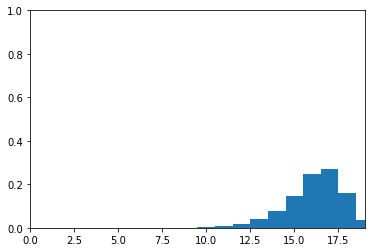

In [0]:
def main():
    bel = np.hstack((np.zeros(10),1,np.zeros(9))) # cria uma array com 20 posições
    plt.figure()
    plt.ion()
    plt.show()
    for i in range(0,9):
        plot_historgram(bel)
        bel = discrete_filter(bel,1)
        print(np.sum(bel))
    for i in range(0,3):
        plot_historgram(bel)
        bel = discrete_filter(bel,-1)
        print(np.sum(bel))
    plt.ioff()
    plt.show()

if __name__ == "__main__":
    main()

## Exercise 2: Particle Filter
In the following you will implement a complete particle filter. A code skeleton with the particle filter work flow is provided for you. A visualization of the particle filter state is also provided by the framework.</br>

The following folders are contained in the pf framework.tar.gz tarball:

**data** This folder contains files representing the world definition and sensor readings used by the filter.

**code** This folder contains the particle filter framework with stubs for you to complete.

You can run the particle filter in the terminal: *python particle filter.py*. It will only work properly once you filled in the blanks in the code.

Some implementation tips:

* To read in the sensor and landmark data, we have used dictionaries. Dictionaries provide an easier way to access data structs based on single or multiple keys. The functions read sensor data and read world data in the read data.py file read in the data from the files and build a dictionary for each of them with time stamps as the primary keys.

To access the sensor data from the sensor readings dictionary, you can use

**sensor readings[timestamp,’sensor’][’id’]**

**sensor readings[timestamp,’sensor’][’range’]**

**sensor readings[timestamp,’sensor’][’bearing’]**

and for odometry you can access the dictionary as

**sensor readings[timestamp,’odometry’][’r1’]**

**sensor readings[timestamp,’odometry’][’t’]**

**sensor readings[timestamp,’odometry’][’r2’]**

To access the positions of the landmarks from landmarks dictionary , you can use

**position x = landmarks[id][0]**

**position y = landmarks[id][1]**

1. Complete the code blank in the sample motion model function by implementing the odometry motion model and sampling from it. The function samples new particle positions based on the old positions, the odometry measurements δrot1, δtrans and δrot2 and the motion noise. The motion noise parameters are:

[α1, α2, α3, α4] = [0.1, 0.1, 0.05, 0.05]

The function returns the new set of parameters, after the motion update.


In [0]:
def sample_motion_model(odometry, particles):
    # Samples new particle positions, based on old positions, the odometry
    # measurements and the motion noise
    # (probabilistic motion models slide 27)
    
    delta_rot1 = odometry['r1']
    delta_trans = odometry['t']
    delta_rot2 = odometry['r2']
    
    # the motion noise parameters: [alpha1, alpha2, alpha3, alpha4]
    noise = [0.1, 0.1, 0.05, 0.05]
    
    # standard deviations of motion noise
    sigma_delta_rot1 = noise[0] * abs(delta_rot1) + noise[1] * delta_trans
    
    sigma_delta_trans = noise[2] * delta_trans + noise[3] * (abs(delta_rot1) + abs(delta_rot2))
    
    sigma_delta_rot2 = noise[0] * abs(delta_rot2) + noise[1] * delta_trans
    
    # "move" each particle according to the odometry measurements plus sampled noise
    # to generate new particle set
    
    new_particles = []
    for particle in particles:
        new_particle = dict()
        #sample noisy motions
        noisy_delta_rot1 = delta_rot1 + np.random.normal(0, sigma_delta_rot1)
        noisy_delta_trans = delta_trans + np.random.normal(0, sigma_delta_trans)
        noisy_delta_rot2 = delta_rot2 + np.random.normal(0, sigma_delta_rot2)
        
        #calculate new particle pose
        new_particle['x'] = particle['x'] + noisy_delta_trans * np.cos(particle['theta'] + noisy_delta_rot1)
        new_particle['y'] = particle['y'] +  noisy_delta_trans * np.sin(particle['theta'] + noisy_delta_rot1)
        new_particle['theta'] = particle['theta'] + noisy_delta_rot1 + noisy_delta_rot2
        new_particles.append(new_particle)
    return new_particles

2. Complete the function eval sensor model. This function implements the measurement update step of a particle filter, using a range-only sensor. It takes as input landmarks positions and landmark observations. It returns a list of weights for the particle set. See slide 15 of the particle filter lecture for the definition of the weight w. Instead of computing a probability, it is sufficient to compute the likelihood p(z|x, l). The standard deviation of the Gaussian zero-mean measurement noise is σr = 0.2.


In [0]:
def eval_sensor_model(sensor_data, particles, landmarks):
    # Computes the observation likelihood of all particles, given the
    # particle and landmark positions and sensor measurements
    # (probabilistic sensor models slide 33)
    # 
    # The employed sensor model is range only.
    
    sigma_r = 0.2
    
    #measured landmark ids and ranges
    ids = sensor_data['id']
    ranges = sensor_data['range']
    
    weights = []
    
    #rate each particle
    for particle in particles:
        all_meas_likelihood = 1.0 #for combining multiple measurements
        #loop for each observed landmark
        for i in range(len(ids)):
            lm_id = ids[i]
            meas_range = ranges[i]
            
            lx = landmarks[lm_id][0]
            ly = landmarks[lm_id][1]
            px = particle['x']
            py = particle['y']
            
            #calculate expected range measurement
            meas_range_exp = np.sqrt( (lx - px)**2 + (ly - py)**2 )
            
            #evaluate sensor model (probability density function of normal distribution)
            meas_likelihood = scipy.stats.norm.pdf(meas_range, meas_range_exp, sigma_r)
            
            #combine (independent) measurements
            all_meas_likelihood = all_meas_likelihood * meas_likelihood
            
        weights.append(all_meas_likelihood)
    #normalize weights
    normalizer = sum(weights)
    weights = weights / normalizer
    return weights

3. Complete the function resample particles by implementing stochastic universal sampling. The function takes as an input a set of particles and the corresponding weights, and returns a sampled set of particles. 


In [0]:
def resample_particles(particles, weights):
    # Returns a new set of particles obtained by performing
    # stochastic universal sampling, according to the particle
    # weights.
    
    new_particles = []
    
    # distance between pointers
    step = 1.0/len(particles)
    
    # random start of first pointer
    u = np.random.uniform(0,step)
    
    # where we are along the weights
    c = weights[0]
    
    # index of weight container and corresponding particle
    i = 0
    
    new_particles = []
    
    #loop over all particle weights
    for particle in particles:
        #go through the weights until you find the particle
        #to which the pointer points
        while u > c:
            i = i + 1
            c = c + weights[i]
        #add that particle
        new_particles.append(particles[i])
        #increase the threshold
        u = u + step
    return new_particles